# EDA

song_data_yewon_ver05, artist_info_ver04 데이터를 사용한 EDA 노트북. <br>
시각화는 일단 ggplot으로 진행, 웹페이지에 들어갈경우 개선해보쟈

In [1]:
import pandas as pd
import numpy as np
import re
from plotnine import *
from pandas import DataFrame

In [2]:
s_df = pd.read_csv('tidydata/song_data_yewon_ver05.csv')
a_df = pd.read_csv('artist_info_ver04.csv')

In [3]:
d = pd.merge(s_df, a_df, on='artist')

In [4]:
# 아티스트데이터와 노래데이터 머지------------------
df = d.copy()

## 1. artist/song data간의 성별비율을 보자.

In [5]:
gender = a_df['gender'].value_counts()

In [6]:
gender_df = gender.rename_axis('gender').reset_index(name='counts')
gender_df

,gender,counts
0,남,167
1,여,157
2,혼,7


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


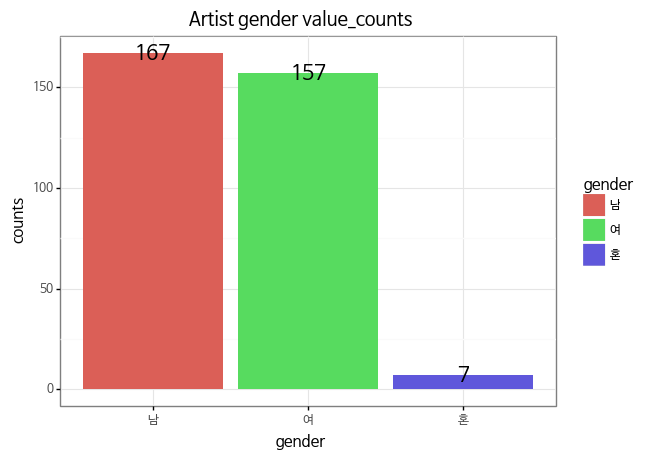

<ggplot: (12486888)>

In [7]:
(ggplot(gender_df, aes(x='gender', y='counts', fill='gender'))
+ geom_bar(stat='identity', position='dodge')
+ theme_bw()
+ theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text())
+ geom_text(aes(label='counts'), size=15)
+ ggtitle('Artist gender value_counts')
)

In [8]:
df2 = df[['title', 'artist', 'is_title', 'gender', 'lyricist', 'artist_m', 'release_date']]

In [9]:
gender2 = df2['gender'].value_counts()

In [10]:
gender2_df = gender2.rename_axis('gender').reset_index(name='counts')
gender2_df

,gender,counts
0,남,6244
1,여,3437
2,혼,378


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


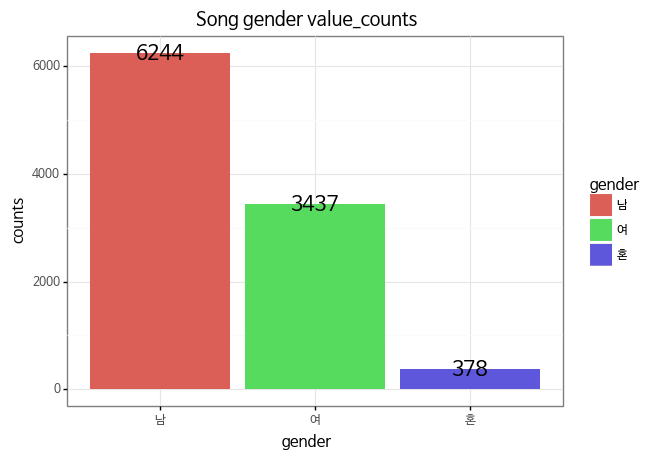

<ggplot: (-9223372036841790874)>

In [11]:
(ggplot(gender2_df, aes(x='gender', y='counts', fill='gender'))
+ geom_bar(stat='identity', position='dodge')
+ theme_bw()
+ theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text())
+ geom_text(aes(label='counts'), size=15)
+ ggtitle('Song gender value_counts')
)

**----->> artist데이터의 남여그룹수 차이가 10밖에 나지 않는데도 불구하고, song데이터에서 남그룹의 곡이 여그룹의 1.8배를 차지함. <br> ----->> 남자아이돌이 곡을 더 많이 낸다!**

## 2. 항상 남자아이돌이 곡을 많이 냈을까? 시대별로도 보자.

In [12]:
df2.head()

,title,artist,is_title,gender,lyricist,artist_m,release_date
0,태지 보이스,서태지와 아이들,수록곡,남,서태지,"서태지, 양현석, 이주노",1996.06.07
1,시대유감(時代遺憾),서태지와 아이들,타이틀 곡,남,서태지,"서태지, 양현석, 이주노",1996.06.07
2,수시아(誰是我),서태지와 아이들,수록곡,남,서태지,"서태지, 양현석, 이주노",1996.06.07
3,Free Style,서태지와 아이들,수록곡,남,"서태지 , 김종서","서태지, 양현석, 이주노",1996.06.07
4,난 알아요,서태지와 아이들,타이틀 곡,남,서태지,"서태지, 양현석, 이주노",1996.02.10


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10059 entries, 0 to 10058
Data columns (total 7 columns):
title           10059 non-null object
artist          10059 non-null object
is_title        10059 non-null object
gender          10059 non-null object
lyricist        7547 non-null object
artist_m        9295 non-null object
release_date    10059 non-null object
dtypes: object(7)
memory usage: 628.7+ KB


In [14]:
release = df2.release_date

In [15]:
# release_date으로 release_year칼럼 새로 만들어주기
m = re.search('^(\d{4})', str(release[0]))
str(m.group(1))

'1996'

In [16]:
r =[]
for i in range(0, len(release)):
    m = re.match('^(\d{4})', str(release[i]))
    try:
        l = str(m.group(1))
        r.append(l)
    except:
        r.append('nan')

In [17]:
d = DataFrame({"release_year": r})

In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 1 columns):
release_year    10059 non-null object
dtypes: object(1)
memory usage: 78.7+ KB


In [19]:
# release_year이 담긴 d과 원데이터인 df 머지
release_df = pd.merge(df2, d, how='outer', left_index=True, right_index=True)

In [20]:
# 잘담겼는지 확인
release_df = release_df[['title', 'artist', 'gender', 'release_year']]
release_df.head()

,title,artist,gender,release_year
0,태지 보이스,서태지와 아이들,남,1996
1,시대유감(時代遺憾),서태지와 아이들,남,1996
2,수시아(誰是我),서태지와 아이들,남,1996
3,Free Style,서태지와 아이들,남,1996
4,난 알아요,서태지와 아이들,남,1996


In [21]:
# 오투알만 빼고 다있당
release_df.loc[release_df['release_year'].str.contains(r'(nan)', regex=True)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,title,artist,gender,release_year
2352,I Know You,오투알,남,nan
2353,Trust Me,오투알,남,nan
2354,박기철 (The Agent Orange),오투알,남,nan
2355,찜,오투알,남,nan
2356,여우야,오투알,남,nan
2357,알지?,오투알,남,nan
2358,이별 담화문,오투알,남,nan
2359,유별난 상황,오투알,남,nan


In [22]:
# release_year로 value_counts해서 df만들기
rr = release_df['release_year'].value_counts()

In [24]:
release_df2 = rr.rename_axis('release_year').reset_index(name='counts')
release_df2 = release_df2.drop([27])

In [25]:
release_df2

,release_year,counts
0,2017,888
1,2015,817
2,2016,815
3,2014,774
4,2013,733
5,2018,683
6,2012,611
7,2011,483
8,2001,470
9,2002,382


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


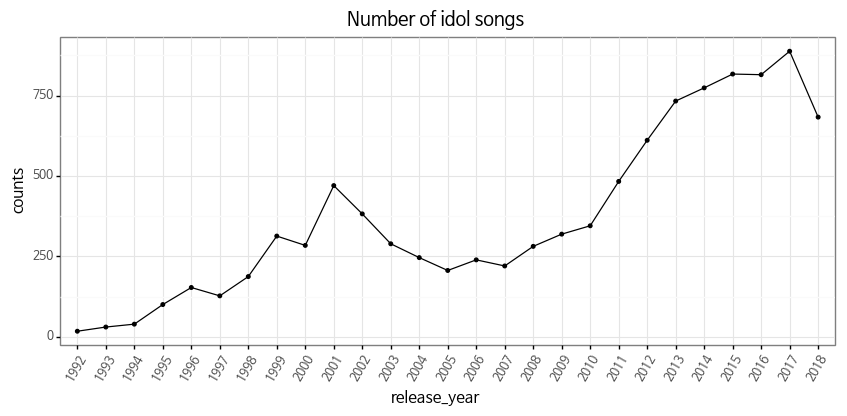

<ggplot: (14172522)>

In [26]:
# 음,,,,일단 연도별로 아이돌 곡 ㅣ시계열 찍어보쟝
(ggplot(release_df2, aes(x='release_year', y='counts', group=1))
+ geom_point(size=1)
+ geom_line()
+ theme_bw()
+ theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60),
        figure_size=(10, 4))
+ ggtitle('Number of idol songs')
)

In [27]:
release_df3 = release_df.groupby(['release_year', 'gender'], as_index=False).count()

In [28]:
release_df3 = release_df3.drop([76])

In [29]:
release_df3.tail()

,release_year,gender,title,artist
71,2017,여,372,372
72,2017,혼,13,13
73,2018,남,467,467
74,2018,여,212,212
75,2018,혼,4,4


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


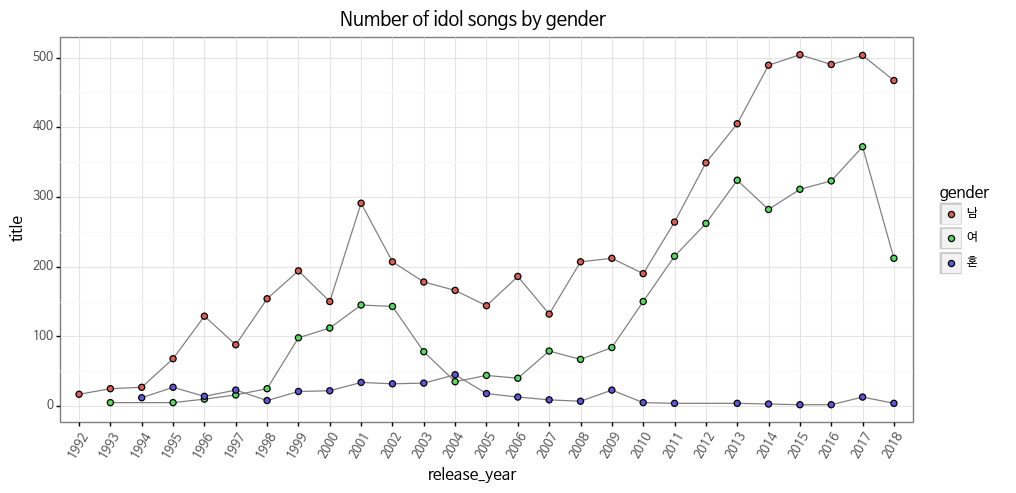

<ggplot: (14349474)>

In [30]:
(ggplot(release_df3, aes(x='release_year', y='title', fill='gender', group='gender'))
+ geom_line(color='gray')
+ geom_point(size=2)
+ theme_bw()
+ theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60),
        figure_size=(11, 5))
+ ggtitle('Number of idol songs by gender')
)

- 항상 남돌이 여돌보다 곡을 많이 발매했음
- 1998년을 기점으로 여돌의 곡수가 급격히 증가함
- 여돌은 2008년부터 남돌의 발매곡수와 차이가 줄어들다가, 2013년을 기점으로 낮아지면서 격차가 커지고 있음
- 